# Something about Loans
## by Chris Silvia

## Preliminary Wrangling

The data used here is a compilation of information on 113,937 loans from Prosper, with 81 different variables included.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os

%matplotlib inline

In [8]:
# Downloading the file

response = requests.get('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')
mydir = 'C:\\Users\\chris\\OneDrive\\Documents\\Coding\\Udacity_Data_Analyst\\Communicate_Data_Findings'
with open(os.path.join(mydir, 'prosperLoanData.csv'), mode='wb') as file:
    file.write(response.content)

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [4]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Topic of Interest

After a preliminary skim of all the variables included, what I am most interested in are the different types of loans, which is included in the 'ListingCategory (numeric)' column. This variable categorizes loans into twenty separate categories. Some examples include debt consolidation, home improvement, personal loans, auto loans, and many others.

The two broad questions I'm curious about are:

 1. Are the characteristics of loan borrowers themselves different based on the types of loans they take out?
 2. How do the qualities of the loans themselves change based on category?

## Univariate Exploration

The first thing I noticed when I tried to dig into the categories is that the variable is listed as an integer between 0 and 20, with each integer representing a different category. I think it is going to be difficult to understand the data unless the categories are stored as strings, so below I added a column to convert the integers into their respective category names.

In [7]:
category_conversion = {
    0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 
    5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby & Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
    11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'
}

loans['ListingCategory'] = loans['ListingCategory (numeric)'].map(category_conversion)

Then, I want to see what the categories are in order of frequency, both numerically and visually.

In [8]:
frequency_order = loans.groupby('ListingCategory').ListingKey.count().sort_values(ascending=False).index
loans.groupby('ListingCategory').ListingKey.count().sort_values(ascending=False)

ListingCategory
Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingKey, dtype: int64

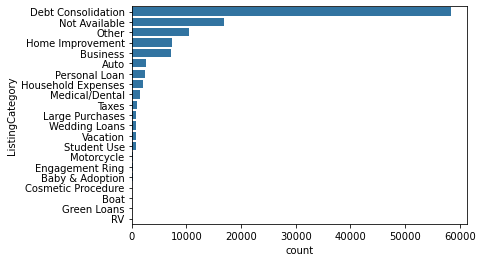

In [27]:
# Setting base color so seaborn bar charts aren't multicolored
base_color = sb.color_palette()[0]

sb.countplot(data=loans, y='ListingCategory', color=base_color, order=frequency_order);

Both programmatically and visually, the type of loan that drowns out all others in frequency is debt consolidation. Its frequency results in many of the infrequent types of loans not even being visible in a bar chart. The next two categories are then "Not Available" and "Other", which doesn't really tell us much. I'll want to include these if I look at averages later, but I'm curious what the bar chart looks like without them.

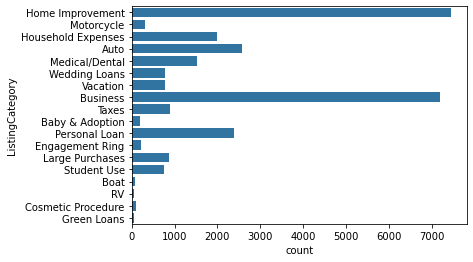

In [28]:
# Creating a list of the loans to remove
undesired_loan_types = ['Debt Consolidation', 'Not Available', 'Other']

# Creating a new dataframe without those loans
specific_loans = loans[~loans.ListingCategory.isin(undesired_loan_types)]

sb.countplot(data=specific_loans, y='ListingCategory', color=base_color);

Home and business loans stick out, with many falling in the one to three thousand range, and a half dozen types having a very limited number of loans to them.

I broke the other variables that I'm interested in looking at into two categories.

- Information about the borrower
    - Occupation
    - IncomeRange
    - StatedMonthlyIncome
    - CreditScoreRangeLower and CreditScoreRangeUpper (possibly in a new column)
    - DebtToIncomeRatio

- Information about the loan
    - LoanStatus
    - LoanOriginalAmount
    - Term
    - BorrowerAPR
    - MonthlyLoanPayment
    - LPGrossPrincipalLoss (the gross amount charged off from the loan if it was charged off)
    
First, let's take a look at a list of the occupations included.

### Univariate Variables About the Borrowers

#### Occupation

In [35]:
occupations_list = loans.groupby('Occupation').ListingKey.count().index.tolist()
print(len(occupations_list))
occupations_list

67


['Accountant/CPA',
 'Administrative Assistant',
 'Analyst',
 'Architect',
 'Attorney',
 'Biologist',
 'Bus Driver',
 'Car Dealer',
 'Chemist',
 'Civil Service',
 'Clergy',
 'Clerical',
 'Computer Programmer',
 'Construction',
 'Dentist',
 'Doctor',
 'Engineer - Chemical',
 'Engineer - Electrical',
 'Engineer - Mechanical',
 'Executive',
 'Fireman',
 'Flight Attendant',
 'Food Service',
 'Food Service Management',
 'Homemaker',
 'Investor',
 'Judge',
 'Laborer',
 'Landscaping',
 'Medical Technician',
 'Military Enlisted',
 'Military Officer',
 'Nurse (LPN)',
 'Nurse (RN)',
 "Nurse's Aide",
 'Other',
 'Pharmacist',
 'Pilot - Private/Commercial',
 'Police Officer/Correction Officer',
 'Postal Service',
 'Principal',
 'Professional',
 'Professor',
 'Psychologist',
 'Realtor',
 'Religious',
 'Retail Management',
 'Sales - Commission',
 'Sales - Retail',
 'Scientist',
 'Skilled Labor',
 'Social Worker',
 'Student - College Freshman',
 'Student - College Graduate Student',
 'Student - College

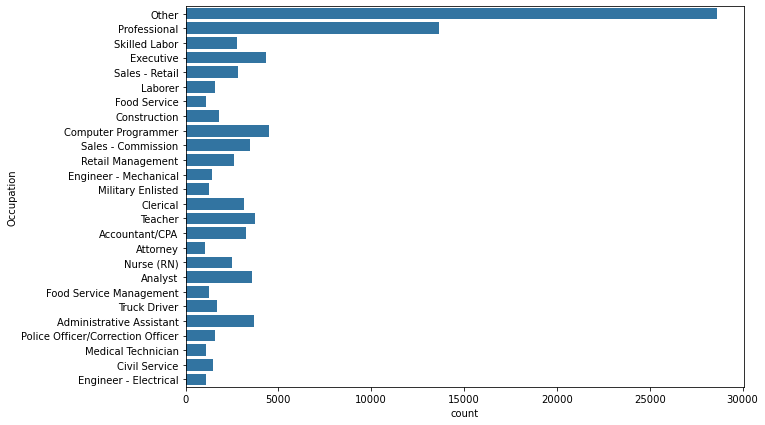

In [131]:
# Sorting out the occupations associated with 1,000 or more loans 
common_occupations = loans.groupby('Occupation').ListingKey.count() >= 1000
common_occupations = common_occupations[common_occupations == True]
common_occupations_list = common_occupations.index.tolist()

# Creating a new dataframe to filter out those loans
common_occupation_loans = loans[loans.Occupation.isin(common_occupations_list)]

plt.figure(figsize=[10,7])
sb.countplot(data=common_occupation_loans, y='Occupation', color=base_color);

There are a lot of occupations here, 67 to be exact. Many of these can be combined, such as the different breakdowns of students, tradesmans, and engineers, but in order to get a readable visual I pulled only the loans with the most common occupations, those that were associated with at least one thousand loans. The categories 'Other' and 'Professional' don't help much, but the rest provide enough information to see that it is almost a random scattering of all different kinds of professions.

Next I'm curious to see what borrower incomes look like. First income range, which is an ordinal variable, and then stated monthly income.

#### Income Range

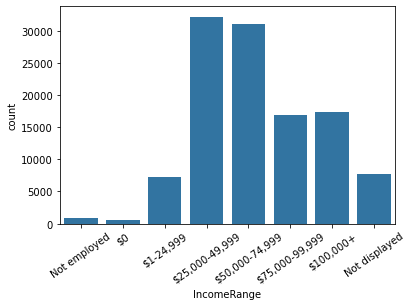

In [29]:
# Converting 'IncomeRange' into an ordered variable type
income_range_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                      '$75,000-99,999', '$100,000+', 'Not displayed']
income_classes = pd.api.types.CategoricalDtype(ordered=True, categories=income_range_order)
loans['IncomeRange'] = loans['IncomeRange'].astype(income_classes)

sb.countplot(data=loans, x='IncomeRange', color=base_color)
plt.xticks(rotation=35);

The majority fall into the 25k to 75k range, but it's actually unclear how far the chart would skew to the right since everything over 100k falls into a single category. I imagine 'Not employed' and '$0' could potentially be combined into a single category, but I'm not sure why they were listed as separated options.

#### Stated Monthly Income

In [79]:
loans.StatedMonthlyIncome.describe().round(0)

count     113937.0
mean        5608.0
std         7478.0
min            0.0
25%         3200.0
50%         4667.0
75%         6825.0
max      1750003.0
Name: StatedMonthlyIncome, dtype: float64

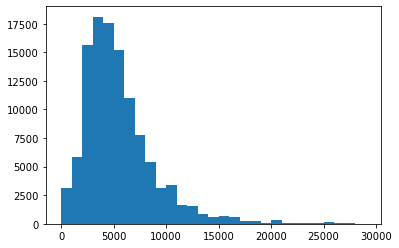

In [132]:
monthly_income_bins = np.arange(loans.StatedMonthlyIncome.min(), loans.StatedMonthlyIncome.max()/60, 1000)
plt.hist(data=loans, x='StatedMonthlyIncome', bins=monthly_income_bins);

Visualizing monthly income was a challenge, I suppose reflecting the economic inequality in the US. Even using a logarithmic scale, the higher outliers so far skewed the chart to the right that it was unreadable. Even arbitrarily capping the chart at 1/60 of the maximum value leaves this very skewed version that lists up to 30k, even though 75% of the incomes fall under 7k a month.

Next up are the credit score variables.

#### CreditScoreRangeLower and CreditScoreRangeUpper

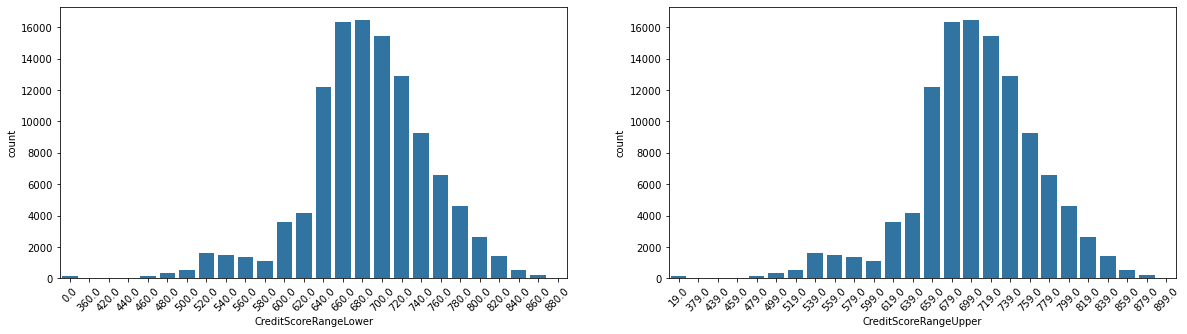

In [100]:
fig = plt.figure(figsize=[20,5])

plt.subplot(1, 2, 1)
sb.countplot(data=loans, x='CreditScoreRangeLower', color=base_color)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sb.countplot(data=loans, x='CreditScoreRangeUpper', color=base_color)
plt.xticks(rotation=45);

Based on these visualizations, these two columns seem to actually be one piece of data, whether the loan borrower's credit score fits into specific even bins of range 20. As a result I feel confident combining these into a single estimated credit score, just drawing the average of the lower and upper ranges. Merging this info into a single column will make it easier to merge with other variables later in the analysis.

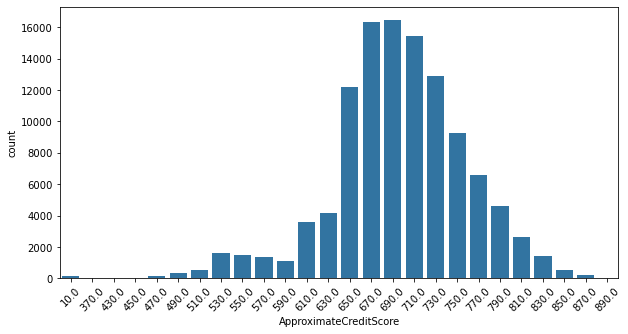

In [104]:
loans['ApproximateCreditScore'] = (loans.CreditScoreRangeLower + loans.CreditScoreRangeUpper + 1) / 2

plt.figure(figsize=[10,5])
sb.countplot(data=loans, x='ApproximateCreditScore', color=base_color)
plt.xticks(rotation=45);

This seems like a fairly standard left leaning distribution.

For the final variable related to specific borrowers, I was very curious about debt to income ratio.

#### Debt to Income Ratio

In [69]:
loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

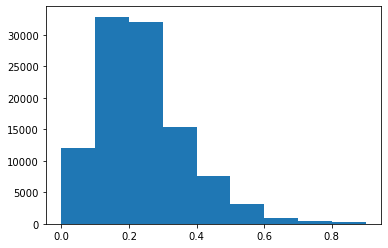

In [118]:
plt.hist(loans.DebtToIncomeRatio, bins=np.arange(0, 1, 0.1));

In [139]:
# The number of borrowers with a debt to income ratio above 1
print((loans.DebtToIncomeRatio > 1).sum())

# The percentage those borrowers constitute of the dataset
print(((loans.DebtToIncomeRatio > 1).sum() / loans.DebtToIncomeRatio.count()).round(5))

799
0.00758


0.76% percent of borrowers had a ratio over one, meaning their debt was larger than their income, so I capped the visualiation at one. It seems the most common values are to have debt between 10% and 30% of one's income, with a very skewed right leaning distribution. The data itself caps that ratio at 10.01, so it is actually impossible to see just how far that outliers actually go.

Now I want to go through the variables that I identified about the loans themselves.

### Univariate Variables About the Loans

#### LoanStatus

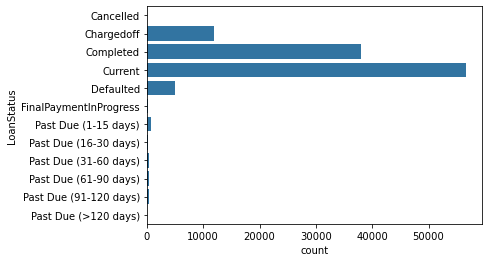

In [165]:
# Converting this variable into an ordered data type alphabetically, it was easier to see the bar chart that way
# as it sorted all of the Past Due categories
loan_status_order = loans.groupby('LoanStatus').ListingKey.count().index.tolist()
loan_status_classes = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_order)
loans['LoanStatus'] = loans['LoanStatus'].astype(loan_status_classes)

sb.countplot(data=loans, y='LoanStatus', color=base_color);

The vast majority are current or completed, though a fair amount are defaulted or charged off. There are a few slightly visible separate categories for past due loans, which may be worth combining into a single category if I want to combine with other visualizations later. It looks like there are over ten thousand charged off loans, though, which is a fair amount, and would be interesting to see with other variables later.

#### LoanOriginalAmount

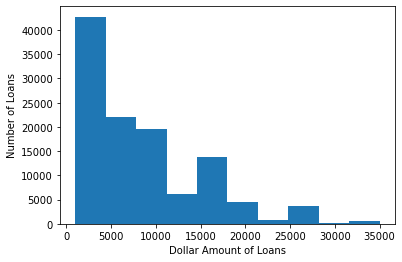

In [142]:
plt.hist(loans.LoanOriginalAmount)
plt.ylabel('Number of Loans')
plt.xlabel('Dollar Amount of Loans');

This was actually rather surprising to me, as I was expecting the loans to go into much higher dollar amounts. The maximum loan is 35k, with over half of the loans in the data under 10k.

#### Term

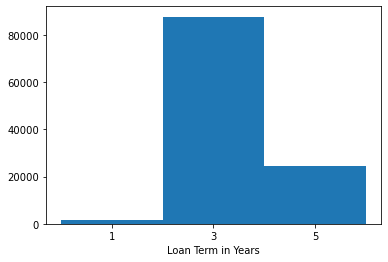

In [157]:
plt.hist(loans.Term, bins=3)
plt.xticks(ticks=[20, 36, 52], labels=[1, 3, 5])
plt.xlabel('Loan Term in Years');

It turns out the loans by term only fall into three categories: one year loans, three year loans, and five year loans. The vast majority are three year loans, with a fair amount of five year loans, and very few one year loans. These are also shorter loan terms that I was expecting to see, but that makes more sense after having seen the maximum loan at $35k.

#### BorrowerAPR

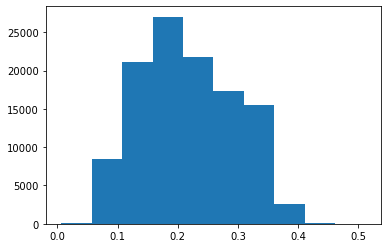

In [166]:
plt.hist(loans.BorrowerAPR);

Borrower APR is probably the simplest and most normaly distribution so far. It seems most loans are between 10% to 40% APR, with the mode being about 20%.

#### MonthlyLoanPayment

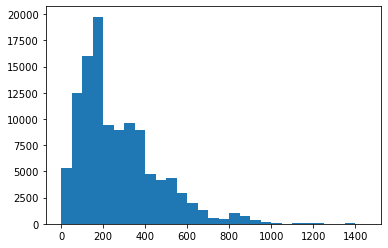

In [179]:
payment_bins = np.arange(0, 1500, 50)
plt.hist(loans.MonthlyLoanPayment, bins=payment_bins);

The maximum monthly loan payment is actually \\$2,251.51, but anything over \\$1,500 wasn't visible in the bar chart. There's a major peak up until \\$200, and then a plateau up through \\$400 a month when it drops off and skews to the right.

#### LPGrossPrincipalLoss (the gross amount charged off from the loan if it was charged off)

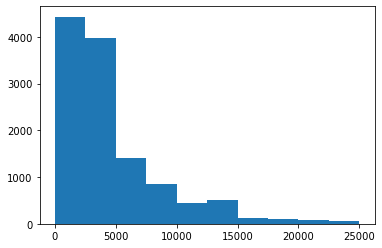

In [194]:
# A separate dataframe is needed of just the charged off loans, otherwise all other loans list a value of zero
charged_off_loans = loans[loans.LoanStatus == 'Chargedoff']

plt.hist(charged_off_loans.LP_GrossPrincipalLoss);

In [188]:
# Creating a new variable that is just whether or not the loan has been charged off
loans['ChargedOff'] = loans['LoanStatus'] == 'Chargedoff'

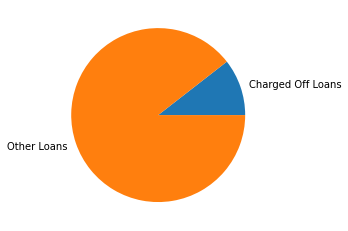

In [193]:
total_charged_off_loans = loans.ChargedOff.sum() / loans.ChargedOff.count()
non_charged_off_loans = (loans.ChargedOff.count() - loans.ChargedOff.sum()) / loans.ChargedOff.count()
charged_off_loans_pie = [total_charged_off_loans, non_charged_off_loans]
plt.pie(x=charged_off_loans_pie, labels=['Charged Off Loans', 'Other Loans']);

The maximum loan charged off is \\$25k, but the majority fall under \\$5k with a very right leaning skew. When I combine this with other variables, I thought it was worth adding variable that just specifies whether the loan was charged off or not, since they comprise a fairly small amount of the data, shown in the pie chart.

## Bivariate Exploration

#### Occupation vs. Stated Monthly Income

First, I'm just curious to see the average stated monthly income for the most frequent occupations listed.

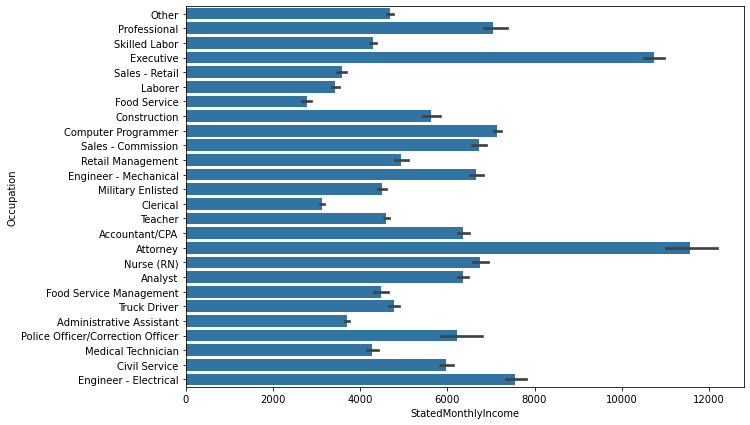

In [222]:
plt.figure(figsize=[10,7])
sb.barplot(data=common_occupation_loans, y='Occupation', x='StatedMonthlyIncome', color=base_color);

I suppose it's not surprising that Attorney is the highest average monthly income or that Food Service is the lowest.

#### Approximate Credit Score vs. Borrower APR

It is stated that the better your credit score, the better APR you can get on loans, but I'm curious to see what the trend looks like in the data and how strong it is.

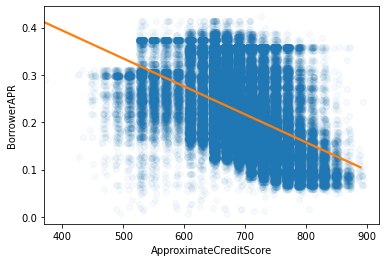

In [221]:
# There are 133 rows where the credit score is 0-20, which I don't believe is legitimate, so I created a
# separate dataframe here to filter those out.
credit_score_df = loans[loans.ApproximateCreditScore > 20]

# Creating another color variable to distinguish the regression line from the plot points
secondary_color = sb.color_palette()[1]

# This one takes a few seconds to load
sb.regplot(data=credit_score_df, x='ApproximateCreditScore', y='BorrowerAPR', 
           x_jitter=5, scatter_kws={'alpha':1/30}, line_kws={'color':secondary_color});

There is a very strong correlation as expected, but what's interesting is that it doesn't truly look like it kicks in until one has a credit score of about 600. The majority of loans for credit scores in the 500 range have an APR between 0.2 and 0.3, and then the APRs explode in variability after 600.

#### Income Range vs. Loan Original Amount

I'm curious to see how much borrowers' income range is affecting the loans that they're taking out, with the caveat that these are the loans that were approved, not requested, which I imagine would look very different.

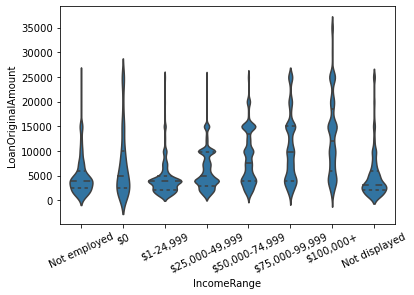

In [227]:
sb.violinplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', color=base_color, inner='quartile');
plt.xticks(rotation=25);

Although for all categories you can see that the loans range up to about \\$25k and the majority of the loans are generally under 5k for most categories, the proportion of loans that are of higher amounts increases as you move into the higher salary ranges.

#### MonthlyLoanPayment vs. StatedMonthlyIncome

Next I'm curious how strongly the monthly payment would correlate to a person's monthly income.

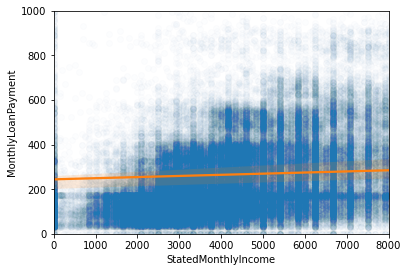

In [238]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
ax.set_xlim(0, 8000)
ax.set_ylim(0, 1000)
sb.regplot(data=loans, x='StatedMonthlyIncome', y='MonthlyLoanPayment', scatter_kws={'alpha':0.01},
          line_kws={'color':secondary_color});

The most notable thing for me here is that once the scatterplot points are made very transparent, there are very visible vertical lines, indicating that they like to set the monthly payments to even or set numbers. I had to zoom in a lot to achieve this level of visibility since the outliers in this data drag the overall image way further out.

#### ChargedOff vs. DebtToIncomeRatio

Another combination I'm curious about is the relationship of borrowers' debt to income ratio versus whether the loan was charged off. How much does this differ for individuals whose loans were charged off? Is it possible having a higher debt overall results in a higher chance of a loan being charged off?

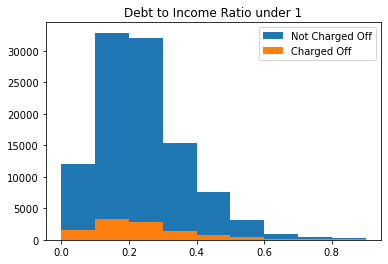

In [292]:
dtir_bins_1 = np.arange(0, 1, 0.1)
p1 = plt.hist(data=loans, x='DebtToIncomeRatio', bins=dtir_bins_1, color=base_color)
p2 = plt.hist(data=charged_off_loans, x='DebtToIncomeRatio', bins=dtir_bins_1, color=secondary_color)
plt.legend(['Not Charged Off', 'Charged Off'])
plt.title('Debt to Income Ratio under 1');

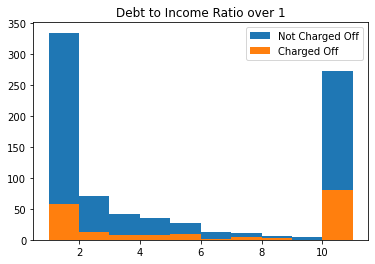

In [293]:
dtir_bins_2 = np.arange(1, 12, 1)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=dtir_bins_2, color=base_color)
plt.hist(data=charged_off_loans, x='DebtToIncomeRatio', bins=dtir_bins_2, color=secondary_color)
plt.legend(['Not Charged Off', 'Charged Off'])
plt.title('Debt to Income Ratio over 1');

Note that these bars are not stacked, simply overlayed one over the other. I separated the data into two sets, those with a debt to income ratio below one and those with a ratio over one, since the overwhelming majority of the data is under one. The proportion of loans that are charged off very closely mimics the overall shape in the first chart, but it becomes a much larger visible component of the total as you approach one. What is interesting is that by proportions, you can see that the largest proportion of charged off loans for any ratio group is that highest group, where everyone is capped at a ratio of 10.01. I think this does provide evidence that larger overall debt for the borrower increases the chances the loan is charged off.

#### Listing Category vs. Loan Original Amount

Since the variable I'm most interested is Listing Category, I figured I would start by comparing that to the averages of the amount of those loans.

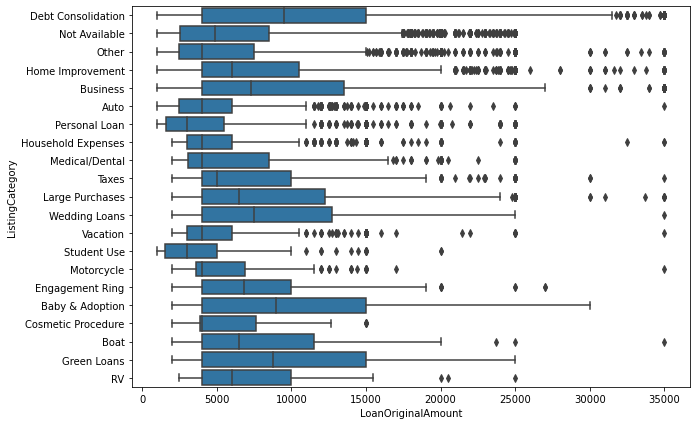

In [290]:
plt.figure(figsize=[10,7])
sb.boxplot(data=common_occupation_loans, y='ListingCategory', x='LoanOriginalAmount', order=frequency_order, color=base_color);

The first thing that jumped out at me, and the reason I chose a boxplot for this chart, is that there are so many outliers. Just looking at averages would not have made visible how certain types of loans have much more deviation than others.

Besides that, ignoring the first three categories on the left that are not as clear, the largest loans seem to be Baby & Adoption, Green Loans, Business, and Home Improvement. The smallest actually seems to be Student Use, which is interesting considering student debt is the second largest debt category in the US, only behind mortgage loans, which interestingly is not a category included in the data.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

#### Sites that I used for help/Sources:

1. Using a dictionary instead of a long series of 'if' statements:
https://stackoverflow.com/questions/31748617/too-many-if-statements
2. Creating a new column based on dictionary values applied to an existing column using .map():
https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
3. Filtering a dataframe using the .isin() method as opposed to python's "in" or "not in" operators:
https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql
4. US debt category totals
https://www.experian.com/blogs/ask-experian/research/consumer-debt-study/